## Data Preprocessing

In [1]:
import pandas as pandas
import seaborn as seaborn
import matplotlib.pyplot as pyplot
from sklearn.preprocessing import LabelEncoder
from sklearn import svm
from sklearn.model_selection import train_test_split

In [2]:
#get the data set
data_set = pandas.read_csv('dataset/lung-cancer-dataset.csv')

In [3]:
#preview the raw dataset 
data_set.head()

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,M,69,1,2,2,1,1,2,1,2,2,2,2,2,2,YES
1,M,74,2,1,1,1,2,2,2,1,1,1,2,2,2,YES
2,F,59,1,1,1,2,1,2,1,2,1,2,2,1,2,NO
3,M,63,2,2,2,1,1,1,1,1,2,1,1,2,2,NO
4,F,63,1,2,1,1,1,1,1,2,1,2,2,1,1,NO


In [4]:
#preview the raw data types 
data_set.dtypes

GENDER                   object
AGE                       int64
SMOKING                   int64
YELLOW_FINGERS            int64
ANXIETY                   int64
PEER_PRESSURE             int64
CHRONIC DISEASE           int64
FATIGUE                   int64
ALLERGY                   int64
WHEEZING                  int64
ALCOHOL CONSUMING         int64
COUGHING                  int64
SHORTNESS OF BREATH       int64
SWALLOWING DIFFICULTY     int64
CHEST PAIN                int64
LUNG_CANCER              object
dtype: object

In [5]:
#preview the raw data information 
data_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309 entries, 0 to 308
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   GENDER                 309 non-null    object
 1   AGE                    309 non-null    int64 
 2   SMOKING                309 non-null    int64 
 3   YELLOW_FINGERS         309 non-null    int64 
 4   ANXIETY                309 non-null    int64 
 5   PEER_PRESSURE          309 non-null    int64 
 6   CHRONIC DISEASE        309 non-null    int64 
 7   FATIGUE                309 non-null    int64 
 8   ALLERGY                309 non-null    int64 
 9   WHEEZING               309 non-null    int64 
 10  ALCOHOL CONSUMING      309 non-null    int64 
 11  COUGHING               309 non-null    int64 
 12  SHORTNESS OF BREATH    309 non-null    int64 
 13  SWALLOWING DIFFICULTY  309 non-null    int64 
 14  CHEST PAIN             309 non-null    int64 
 15  LUNG_CANCER            

In [6]:
#check there is null value in the dataset 
data_set.isnull().sum()

GENDER                   0
AGE                      0
SMOKING                  0
YELLOW_FINGERS           0
ANXIETY                  0
PEER_PRESSURE            0
CHRONIC DISEASE          0
FATIGUE                  0
ALLERGY                  0
WHEEZING                 0
ALCOHOL CONSUMING        0
COUGHING                 0
SHORTNESS OF BREATH      0
SWALLOWING DIFFICULTY    0
CHEST PAIN               0
LUNG_CANCER              0
dtype: int64

In [7]:
#convert string values in to numerical value
labeled_gender = LabelEncoder()
labeled_lung_cancer = LabelEncoder()
data_set['GENDER_N'] = labeled_gender.fit_transform(data_set['GENDER'])
data_set['LUNG_CANCER_N'] = labeled_gender.fit_transform(data_set['LUNG_CANCER'])
data_set.head()

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER,GENDER_N,LUNG_CANCER_N
0,M,69,1,2,2,1,1,2,1,2,2,2,2,2,2,YES,1,1
1,M,74,2,1,1,1,2,2,2,1,1,1,2,2,2,YES,1,1
2,F,59,1,1,1,2,1,2,1,2,1,2,2,1,2,NO,0,0
3,M,63,2,2,2,1,1,1,1,1,2,1,1,2,2,NO,1,0
4,F,63,1,2,1,1,1,1,1,2,1,2,2,1,1,NO,0,0


In [8]:
#remove column which contain string values in to detaset
updated_data_set = data_set.drop(['GENDER','LUNG_CANCER'], axis = 'columns')
updated_data_set.head()

,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,GENDER_N,LUNG_CANCER_N
0,69,1,2,2,1,1,2,1,2,2,2,2,2,2,1,1
1,74,2,1,1,1,2,2,2,1,1,1,2,2,2,1,1
2,59,1,1,1,2,1,2,1,2,1,2,2,1,2,0,0
3,63,2,2,2,1,1,1,1,1,2,1,1,2,2,1,0
4,63,1,2,1,1,1,1,1,2,1,2,2,1,1,0,0


In [9]:
#split updated data set into target data set and input data set  
input_data_set = updated_data_set.drop('LUNG_CANCER_N', axis = 'columns')
target_data_set = updated_data_set['LUNG_CANCER_N']

In [61]:
#split target data and input data into train data and test data
X_train_data, X_test_data, y_train_data, y_test_data = train_test_split(input_data_set, target_data_set, test_size = 0.25, random_state= 40)

## Data Analysis and Visualization 

<AxesSubplot:xlabel='LUNG_CANCER', ylabel='count'>

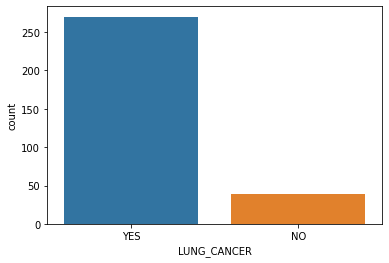

In [64]:
#visualize LUNG_CANCER count using bar plot 
seaborn.countplot(x='LUNG_CANCER',data = data_set)

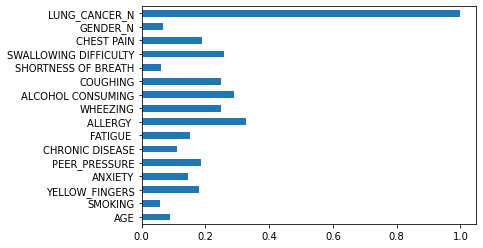

In [65]:
#correlation analysis between the depended variable and the other independent variables 
Correlation=updated_data_set.corrwith(updated_data_set['LUNG_CANCER_N'])
Correlation.plot(kind='barh')
pyplot.show()